# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
!pip install citipy

In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Get today's date as a string
today = pd.Timestamp.today().strftime('%Y-%m-%d')

### Generate the Cities List by Using the `citipy` Library

In [69]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print(cities)

Number of cities in the list: 567
['fortaleza', 'invercargill', 'prineville', 'vorgashor', 'isafjordur', 'tura', 'port-aux-francais', 'waitangi', 'road town', 'walvis bay', 'bardai', 'carnarvon', 'san antonio de pale', 'hamilton', 'luderitz', 'mount gambier', 'ushuaia', 'edinburgh of the seven seas', 'akrehamn', 'whitehorse', 'anibare', 'gadzhiyevo', 'bethel', 'papatowai', 'ribeira grande', 'taiohae', 'poyarkovo', 'mount pearl', 'malvan', 'concepcion', 'coquimbo', 'wailua homesteads', 'adamstown', 'juneau', 'fort mcmurray', 'puerto natales', 'yellowknife', 'olonkinbyen', 'port alfred', 'praia da vitoria', 'tiksi', 'albany', 'lompoc', 'novoagansk', 'stanley', 'port mathurin', 'opuwo', 'georgetown', 'cidade velha', 'cuenca', 'kansanshi', 'happy valley-goose bay', 'folkston', 'al hazm', 'malpe', 'uturoa', 'rongelap', 'guiyang', 'hithadhoo', 'grytviken', 'antofagasta', 'iqaluit', 'chateauneuf-sur-loire', 'puerto san carlos', 'marica', 'pathein', 'puerto cabezas', 'talnakh', 'taulaga', 'tuz

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [70]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    #print(city_url)

    # Get city weather response
    city_response = requests.get(city_url)
    #print(city_response)
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date_unformatted = city_weather['dt']
        city_date_struct = time.localtime(city_date_unformatted) # Raw format from the api call
        city_date = time.strftime('%Y-%m-%d', city_date_struct) # Formatted so it can be readable to humans
    
    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fortaleza
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | prineville
Processing Record 4 of Set 1 | vorgashor
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | road town
Processing Record 10 of Set 1 | walvis bay
Processing Record 11 of Set 1 | bardai
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | san antonio de pale
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | mount gambier
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | akrehamn
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set 1 | anibare
City not found. Skipping...
Processi

In [79]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

print(city_data_df)

             City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0       fortaleza  -3.7227  -38.5247     26.79        83          20   
1    invercargill -46.4000  168.3500     13.90        68          78   
2      prineville  44.2999 -120.8345      4.73        74          75   
3       vorgashor  67.5833   63.9500    -18.60        93          39   
4      isafjordur  66.0755  -23.1240      8.45        88         100   
..            ...      ...       ...       ...       ...         ...   
539         crane  31.3974 -102.3501     17.12        46          47   
540         kindu  -2.9500   25.9500     21.71        98         100   
541         maues  -3.3836  -57.7186     24.59        79          70   
542        tommot  58.9564  126.2925    -10.61        91          98   
543       melfort  52.8667 -104.6177      2.07        80         100   

     Wind Speed Country        Date  
0          3.60      BR  2024-11-11  
1          5.36      NZ  2024-11-11  
2          5.14      

In [80]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortaleza,-3.7227,-38.5247,26.79,83,20,3.60,BR,2024-11-11
1,invercargill,-46.4000,168.3500,13.90,68,78,5.36,NZ,2024-11-11
2,prineville,44.2999,-120.8345,4.73,74,75,5.14,US,2024-11-11
3,vorgashor,67.5833,63.9500,-18.60,93,39,4.00,RU,2024-11-11
4,isafjordur,66.0755,-23.1240,8.45,88,100,9.94,IS,2024-11-11


In [81]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [82]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortaleza,-3.7227,-38.5247,26.79,83,20,3.60,BR,2024-11-11
1,invercargill,-46.4000,168.3500,13.90,68,78,5.36,NZ,2024-11-11
2,prineville,44.2999,-120.8345,4.73,74,75,5.14,US,2024-11-11
3,vorgashor,67.5833,63.9500,-18.60,93,39,4.00,RU,2024-11-11
4,isafjordur,66.0755,-23.1240,8.45,88,100,9.94,IS,2024-11-11


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

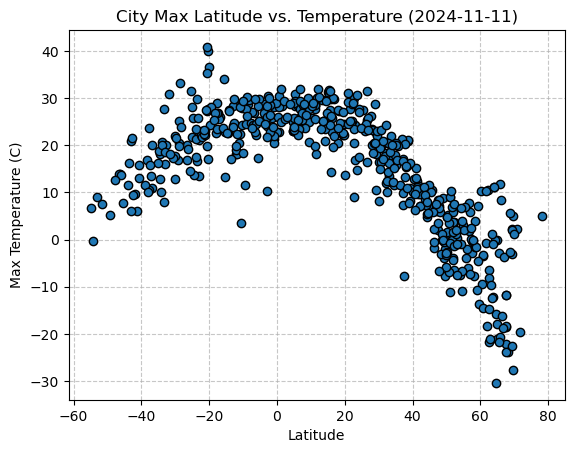

In [83]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Max Latitude vs. Temperature ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True) 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()



#### Latitude Vs. Humidity

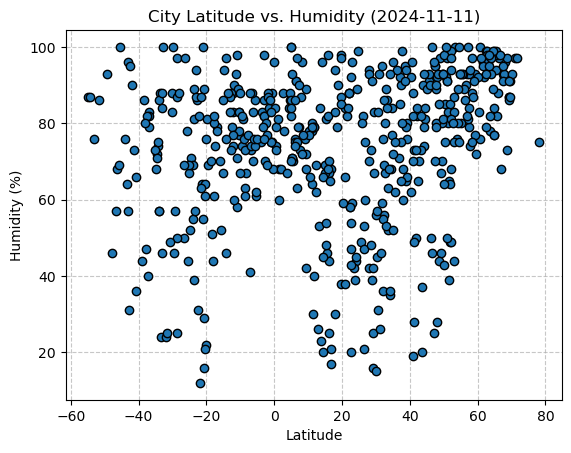

In [84]:
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Humidity ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

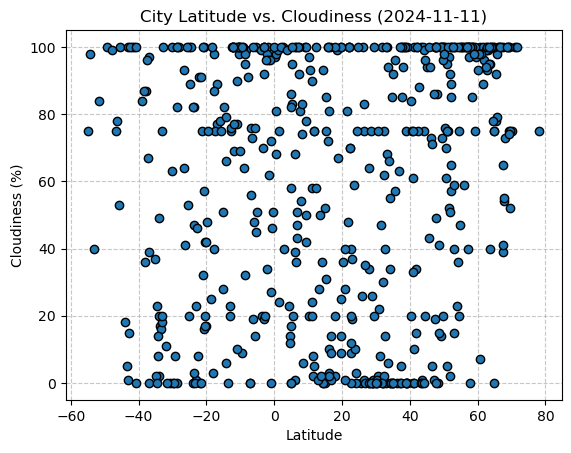

In [85]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Cloudiness ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

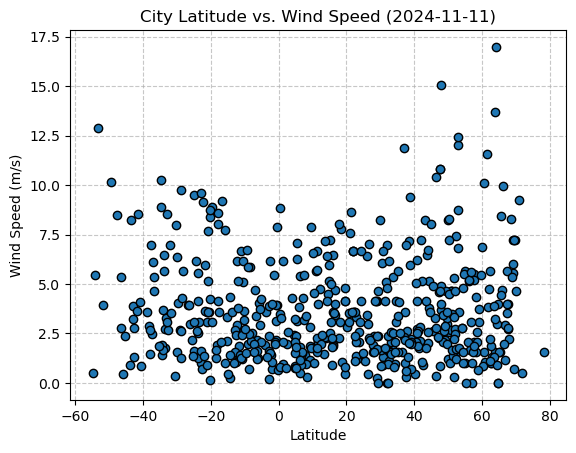

In [86]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Wind Speed ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


## Requirement 2: Compute Linear Regression for Each Relationship


In [87]:
# Define a function to create Linear Regression plots

def create_linear_regression(x, y, x_titles, y_titles):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
  

    print("r-value  : ", r_value, "\np-value  : ", p_value, "\nstd-error: ", std_err)

    regress_values = x * slope + intercept
    #print(regress_values)
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)

# Create Plot
    plt.scatter(x,y, edgecolors='black')
    plt.title(f"{x_titles} vs. {y_titles} ({today})") 
    plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
    plt.xlabel(x_titles)
    plt.ylabel(y_titles)
    plt.grid(linestyle='--', alpha=0.7) 
    plt.gca().set_axisbelow(True)
    plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Show plot
    plt.show()


In [88]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,prineville,44.2999,-120.8345,4.73,74,75,5.14,US,2024-11-11
3,vorgashor,67.5833,63.9500,-18.60,93,39,4.00,RU,2024-11-11
4,isafjordur,66.0755,-23.1240,8.45,88,100,9.94,IS,2024-11-11
5,tura,25.5198,90.2201,27.39,49,0,1.10,IN,2024-11-11
8,road town,18.4167,-64.6167,27.23,79,99,7.76,VG,2024-11-11


In [89]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortaleza,-3.7227,-38.5247,26.79,83,20,3.60,BR,2024-11-11
1,invercargill,-46.4000,168.3500,13.90,68,78,5.36,NZ,2024-11-11
6,port-aux-francais,-49.3500,70.2167,5.13,93,100,10.17,TF,2024-11-11
7,waitangi,-43.9535,-176.5597,11.57,76,18,0.89,NZ,2024-11-11
9,walvis bay,-22.9575,14.5053,13.53,94,1,1.03,NaN,2024-11-11


###  Temperature vs. Latitude Linear Regression Plot

r-value  :  -0.8787978980337214 
p-value  :  5.270750499395763e-119 
std-error:  0.017755027254208786
y = -0.62x + 34.62


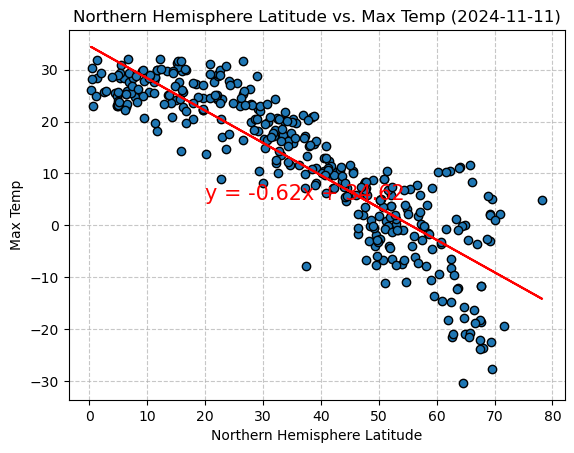

In [90]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Max Temp' )

r-value  :  0.6108968296259014 
p-value  :  1.3685228048003224e-19 
std-error:  0.03049162247182305
y = 0.31x + 28.19


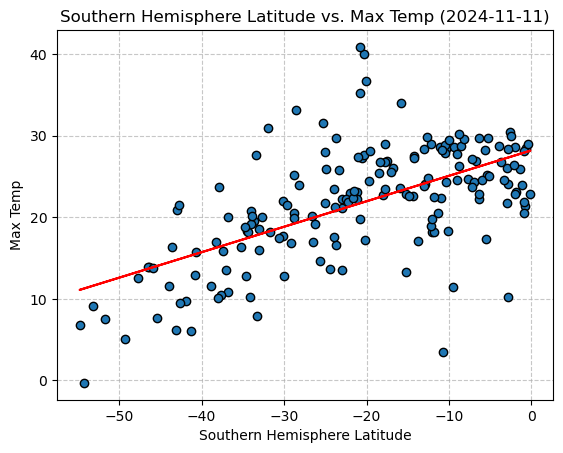

In [91]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

r-value (correlation coefficient):

Value: -0.8787978980337214  for the Northern Hemisphere. This is a negative number close to 1, indicating a strong negative correlation between the latitude and max temperature. In simpler terms, as the values of latitude increase, the values of max temp tend to decrease as well. As latitudes increase (moving away from the equator towards the North Pole), the maximum temperatures tend to decrease as well. This again aligns with our expectation of colder temperatures at higher latitudes.

Value: 0.6108968296259014  for the Southern Hemisphere. This is a positive number close to 1, indicating a strong positive correlation between the latitude and max temperature. In simpler terms, as the values of latitude increase, the values of max temp tend to increase as well. As latitudes increase (moving away from the equator towards the South Pole), the maximum temperatures tend to increase as well. This aligns with our general understanding that the equator is typically warmer than the poles.

### Humidity vs. Latitude Linear Regression Plot

r-value  :  0.31273440149098525 
p-value  :  9.559840944701439e-10 
std-error:  0.05099780778646315
y = 0.32x + 63.25


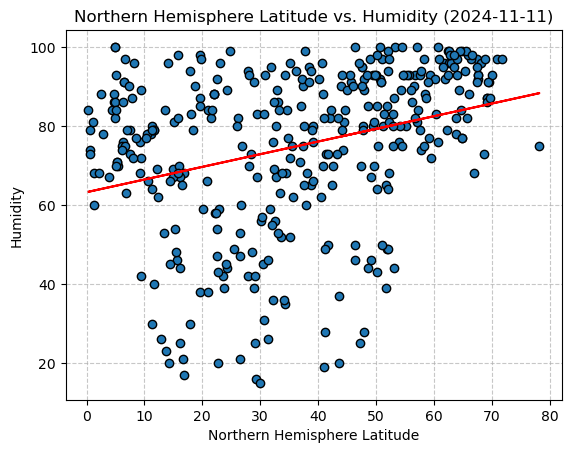

In [92]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Humidity')

r-value  :  0.1586627622702684 
p-value  :  0.03440184515619366 
std-error:  0.10120314256432404
y = 0.22x + 76.22


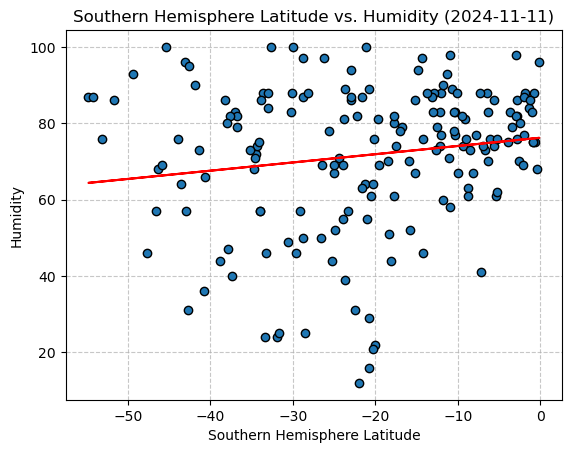

In [93]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

r-value (correlation coefficient): (Northern Hemisphere) and (Southern Hemisphere). This value is very close to 0, signifying an almost negligible linear correlation and there's practically no linear trend between these variables based solely on the r-value.

p-value:(Northern Hemisphere). A p-value this high (greater than 0.05 for Northern Hemisphere) suggests that the observed r-value is likely due to random chance and not a true underlying relationship between latitude and humidity. There's weak evidence for a statistically significant connection. A p-value this low (typically below 0.05 for Southern Hemisphere) suggests that the observed r-value is statistically significant.

There's statistically no proof, based on these values, that increasing or decreasing latitude in the Northern Hemisphere has a corresponding linear increase or decrease in humidity.

### Cloudiness vs. Latitude Linear Regression Plot

r-value  :  0.29228475743724947 
p-value  :  1.2157579378702436e-08 
std-error:  0.09764934263783948
y = 0.57x + 38.55


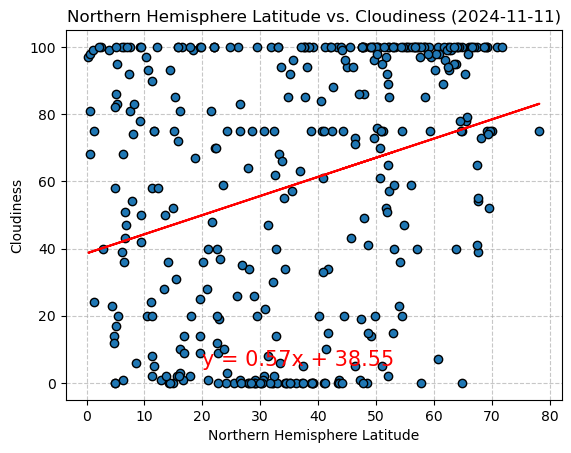

In [94]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Cloudiness')

r-value  :  0.13283301717997972 
p-value  :  0.07713298763568877 
std-error:  0.2011451768841175
y = 0.36x + 66.23


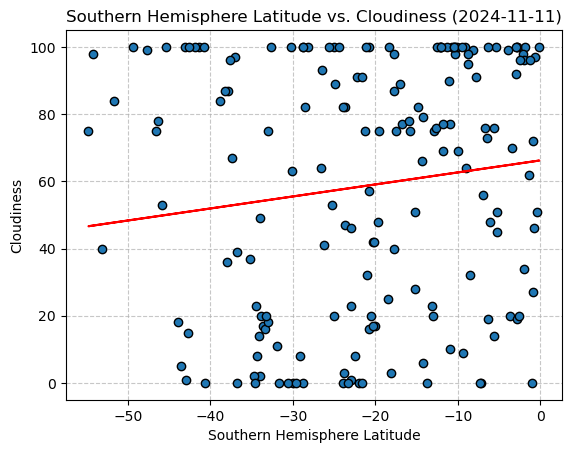

In [95]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

r-value (correlation coefficient): (Northern Hemisphere). The value signifies an almost negligible correlation, either positive or negative. In this case, the slightly negative sign suggests a very weak tendency for cloudiness to decrease as latitude increases, but the magnitude is so small it's practically irrelevant.

p-value: (Northern Hemisphere). A p-value these levels suggests that the observed r-value is very likely due to random chance and not a true underlying relationship between cloudiness and latitude. There's very weak evidence for a statistically significant connection. p-value (for Southern Hemisphere) suggests that the observed r-value is statistically significant. This means it's less likely due to random chance and there might be a genuine underlying relationship between the variables.

### Wind Speed vs. Latitude Linear Regression Plot

r-value  :  0.1322948465001042 
p-value  :  0.011295018734415959 
std-error:  0.006934023923457146
y = 0.02x + 2.91


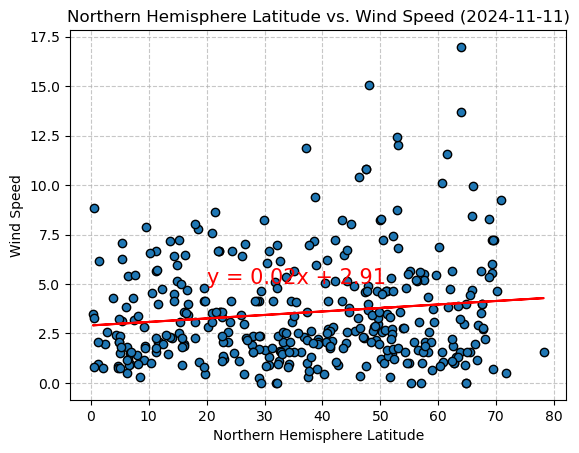

In [96]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Wind Speed')

r-value  :  -0.29794809109096176 
p-value  :  3.128545527532122e-05 
std-error:  0.012641458092561633
y = -0.05x + 2.5


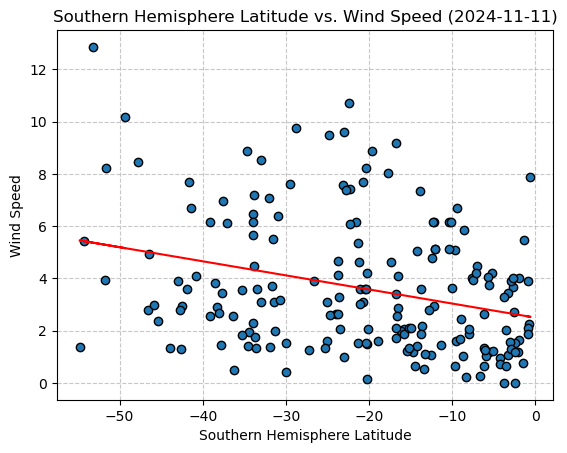

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Lastly, for the correlaton between the latitude and wind speed values. r-value (correlation coefficient): (Northern Hemisphere) and (Southern Hemisphere). There's practically no linear relationship between the two variables based on these values. Any slight positive or negative trend is so weak that it's likely just a random fluctuation in the data, not a genuine association.